# 1. PCA

In [1]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [2]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [3]:
import pandas as pd
import numpy as np
calm = pd.read_csv('false_PM.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('true_PM.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

<IPython.core.display.Javascript object>


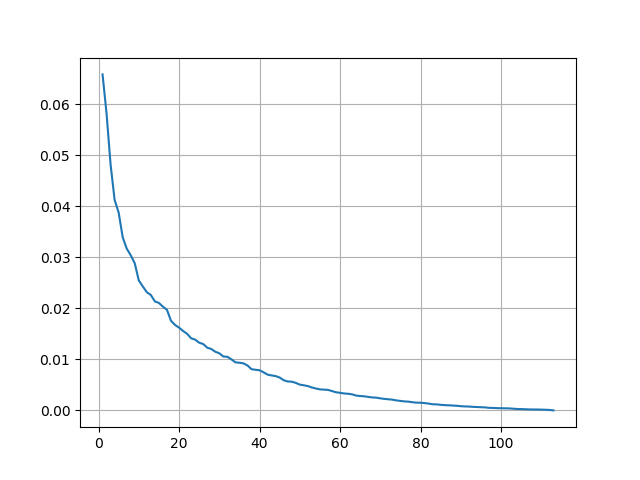

In [51]:
from sklearn.decomposition import PCA
pca = PCA(min(delta.shape)).fit(delta)
y = pca.explained_variance_ratio_
import matplotlib.pylab as plt
%matplotlib notebook
x = [ind+1 for ind, i in enumerate(y)]
plt.plot(x, y)
plt.grid()

# 2. Noice Search

In [1]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [2]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [3]:
import pandas as pd
import numpy as np
calm = pd.read_csv('false_PM.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('true_PM.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

In [4]:
# Score Function
def d(x):
    return np.linalg.norm(x, 3)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    M = (max(sizes) - min(sizes))/len(y) * len(classes)
    return M
def SF(X,y):
    alpha = 0
    return 1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y))) + alpha * np.exp(-balance(y))

In [6]:
from sklearn.decomposition import PCA
res = dict()
gen = range(1, 10)
init = 100
D = 10
delta_ = PCA(D).fit_transform(delta)

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
res_y  = list()
eps = np.linspace(2.5, 7.5, 1000)
for i in eps:
    y = DBSCAN(eps = i).fit_predict(delta_)
    res_y.append(y)

In [8]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['DBSCAM'] = cur_res

<IPython.core.display.Javascript object>


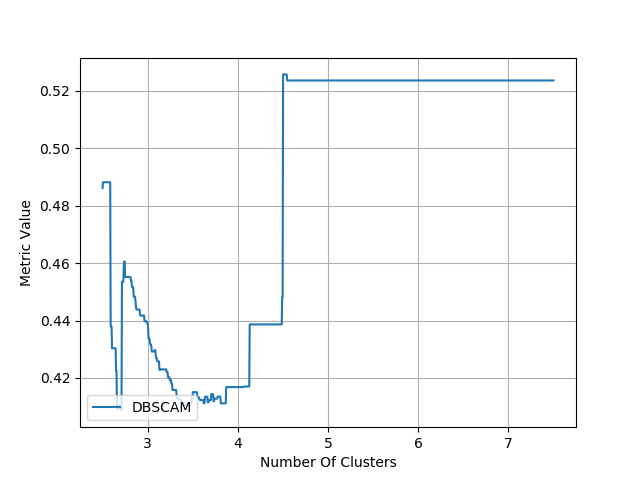

In [10]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in eps], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.savefig('Images/clusters_number.pdf')

# 3. Clusters Number

In [74]:
import numpy as np
def smooth_signum(delta, eps = 0.05):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [75]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [76]:
import pandas as pd
import numpy as np
calm = pd.read_csv('false_PM.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('true_PM.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)
folder_results = 'DeltaMain'

In [55]:
# Score Function
def d(x):
    return np.linalg.norm(x, 2)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*np.sqrt(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    return min(min(sizes) / 10, 1)
def SF(X,y):
    alpha = 0.1
    return (1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y)))) * balance(y)

In [56]:
from sklearn.decomposition import PCA
res = dict()
gen = range(1, 6)
init = 100
D = 20
delta_ = PCA(D).fit_transform(delta)

In [57]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
res_y  = list()
for i in gen:
    y = KMeans(n_clusters=i, n_init = init).fit_predict(delta_)
    res_y.append(y)

In [58]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['KMeans'] = cur_res

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'tied'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [60]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [61]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'diag'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [62]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [63]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'spherical'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [64]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'euclidean'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist).fit_predict(delta_)
    res_y.append(y)

In [66]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

In [67]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'l1'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist, linkage = 'complete').fit_predict(delta_)
    res_y.append(y)

In [68]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

<IPython.core.display.Javascript object>


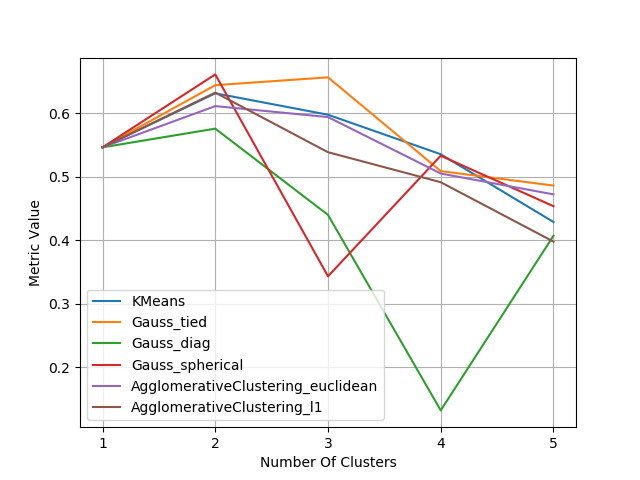

In [69]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in gen], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.xticks([i for i in gen])
plt.savefig('Images/clusters_number.pdf')

# 3. Many Clusters

In [34]:
import pandas as pd
import numpy as np
calm = pd.read_csv('false_PM.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('true_PM.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)
folder_results = 'DeltaMain'

In [35]:
folder_results = "ManyClusters/"

## Clustering

0.6554236422262449
0 69
1 44


<IPython.core.display.Javascript object>


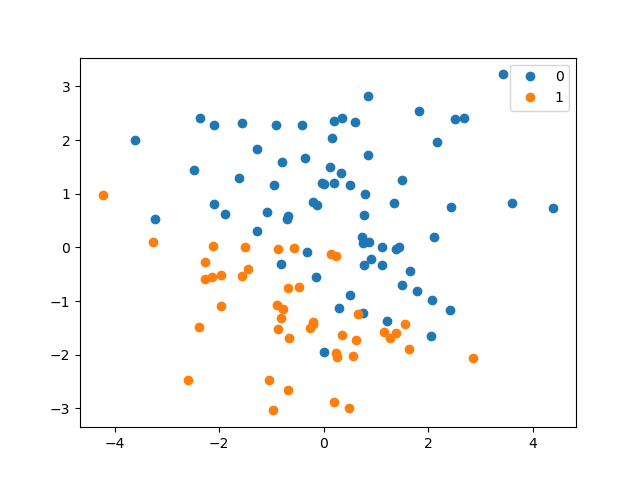

In [84]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

delta_ = PCA(20).fit_transform(delta)
y = GaussianMixture(n_components=2, n_init = 100, covariance_type = 'spherical').fit_predict(delta_)
print(SF(delta_, y))
import matplotlib.pylab as plt
%matplotlib notebook
delta_ = PCA(2).fit_transform(delta)
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

204 204


<IPython.core.display.Javascript object>


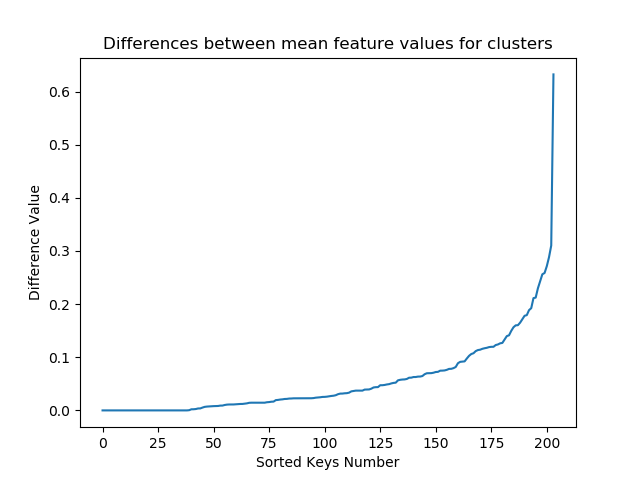

Text(0, 0.5, 'Difference Value')

In [85]:
def get_max(D):
    res = list()
    for i in D:
        for j in D:
            res.append(np.absolute(i-j))
    res = np.array(res)
    return res.max(axis = 0)
print(len(cluster_delta), len(keys))
cluster_delta = get_max(D)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [86]:
m = 0.6*max([i[0] for i in cluster_delta])
main_keys = [i for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
for ind in main_keys:
    print(keys[ind[1]], smooth_signum(D[0][ind[1]], eps = 0.1), smooth_signum(D[1][ind[1]], eps = 0.1))
main_keys = [i[1] for i in main_keys]

Number of Main Keys 1
Часть речи: глагол 1.0 -1.0


In [80]:
m = 0.6*max([i[0] for i in cluster_delta])
main_keys = [i for i in cluster_delta if i[0] >= 0]
import pandas as pd
eps = 0.1
Q = list(np.vstack((smooth_signum(D[0], eps = eps), smooth_signum(D[1], eps = eps), (D[0]-D[1])**2)).T)
Q.sort(key = lambda x: -x[2])
Q = np.array(Q)
Q = Q[:, :2]
df = pd.DataFrame(Q, index = [keys[i[1]] for i in main_keys[-1::-1]])
df.to_excel("Features.xlsx") 

In [88]:
def f(delta_, delta, n = 11):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = len(main_keys)-1

76
0 Часть речи: глагол


<IPython.core.display.Javascript object>


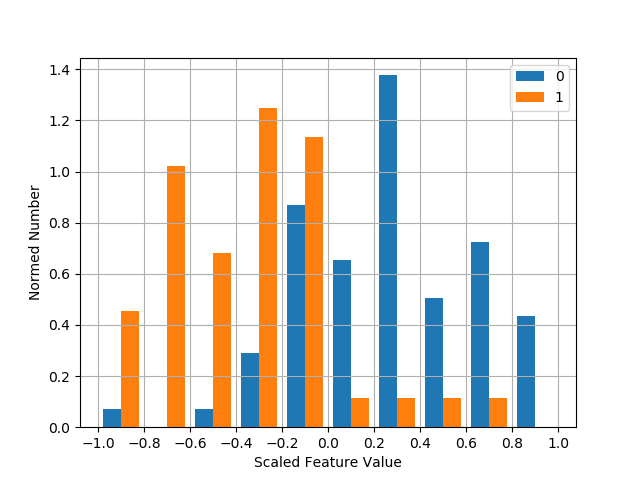

In [89]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(main_keys[ind])
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1

1 Часть речи: глагол


<IPython.core.display.Javascript object>


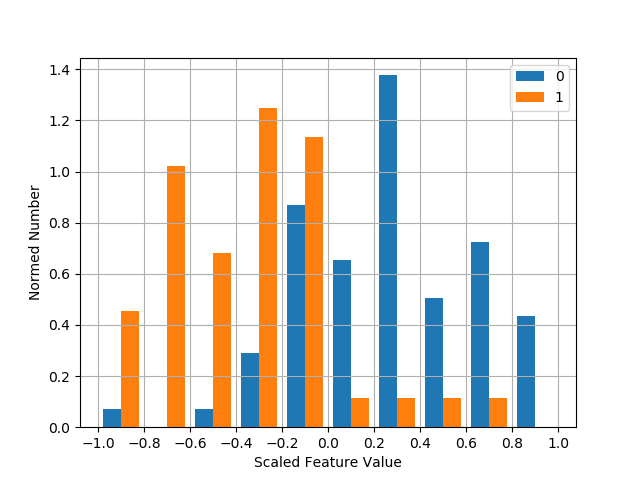

In [90]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(len(main_keys)-1 - ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')
ind -= 1